# Neoclassical transport calculations for axisymmetric plasmas

## Define particles in our simulation

In [1]:
import astropy.units as u
import numpy as np

from plasmapy.particles import IonizationStateCollection

all_species = IonizationStateCollection(
    {
        "H": [0, 1],
        #      "D": [0, 1],   raises ParticleError, why?
        "C": [0, 0, 0, 0, 0, 0, 1],
    },
    n0=1e20 * u.m ** -3,
    abundances={"H": 1, "C": 0.08},
    T_e=10 * u.eV,
)

<IonizationStateCollection for: H, C>

## `SymbolicEquilibrium`

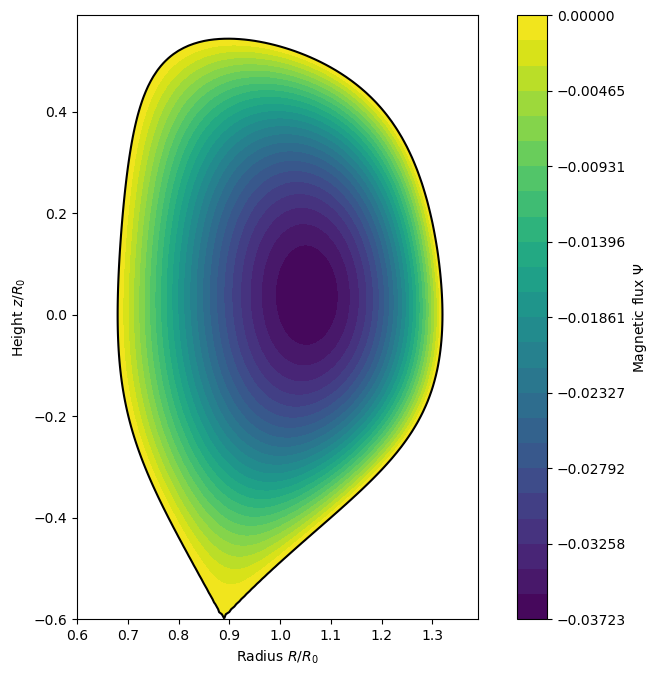

In [2]:
from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = {"aspect_ratio": 0.32, "A": -0.155, "elongation": 1.7, "triangularity": 0.33}
eq = SymbolicEquilibrium(**params, B0=5.2, config="single-null")
eq.plot();

## `FluxSurface`

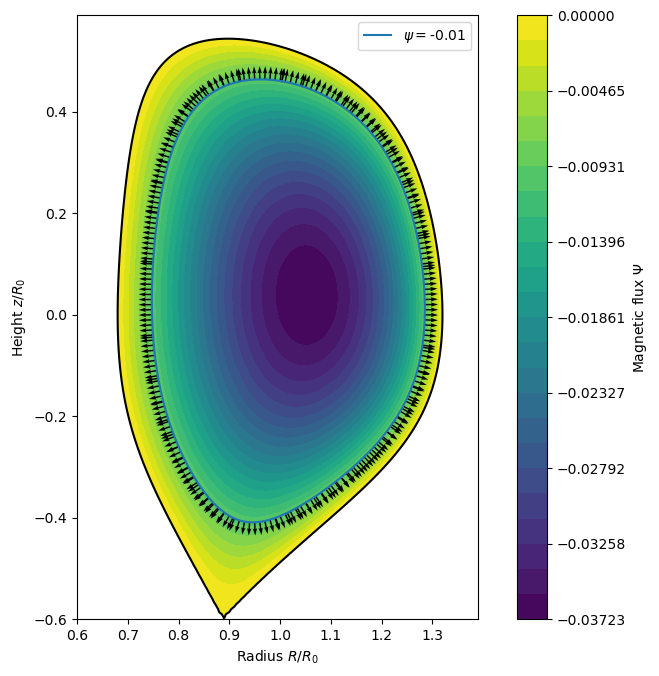

In [3]:
ax = eq.plot()
flux_surface = eq.get_flux_surface(-0.01)
flux_surface.plot(ax, n=True);

## `FlowCalculator`

In [4]:
from plasmapy.transport.flows import FlowCalculator

density_gradient = {
    "H 1+": 1e18 * u.m ** -3 / u.m,
    "C 1+": 1e18 * u.m ** -3 / u.m,
}
temperature_gradient = {
    "H 1+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 1+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
}

fc = FlowCalculator(all_species, flux_surface, density_gradient, temperature_gradient)

AttributeError: 'IonicLevel' object has no attribute 'symbol'

### Units

In [ ]:
sym = "H 1+"
S_pt = fc.S_pt[sym]

In [ ]:
Aai = fc.Aai[sym]

In [ ]:
H = fc.all_species["H"]

In [ ]:
(S_pt / Aai).si

### Bootstrap current

In [ ]:
fc.bootstrap_current.si  # TODO should be A/m^2? missing a magnetic field in the denominator somewhere?

In [ ]:
(fc.bootstrap_current / u.T).to(u.A / u.m ** 2)

### Fluxes

In [ ]:
flux_unit = u.m ** -2 / u.s

In [ ]:
fc._fluxes_BP

In [ ]:
fc._fluxes_BP["H 1+"].particle_flux.to(flux_unit)

In [ ]:
fc._fluxes_BP["H 1+"].heat_flux.to(u.J * flux_unit)

In [ ]:
fc._fluxes_CL

In [ ]:
(fc._fluxes_CL["H 1+"].particle_flux / (u.kg / u.s / u.m ** 4)).to(flux_unit)

In [ ]:
(fc._fluxes_CL["H 1+"].heat_flux / (u.kg / u.s / u.m ** 4)).to(u.J * flux_unit)

In [ ]:
fc._fluxes_PS

In [ ]:
(fc._fluxes_PS["H 1+"].particle_flux / (u.kg / u.s / u.m ** 3)).to(flux_unit)

In [ ]:
(fc._fluxes_PS["H 1+"].heat_flux / (u.kg / u.s / u.m ** 3)).to(u.J * flux_unit)

In [ ]:
flux_unit = u.m ** -2 / u.s

In [ ]:
[
    (flux[sym].particle_flux.unit.si / flux_unit).si
    for flux in [fc._fluxes_BP, fc._fluxes_CL, fc._fluxes_PS]
]

In [ ]:
[
    (flux[sym].heat_flux.unit / flux_unit / u.J).si
    for flux in [fc._fluxes_BP, fc._fluxes_CL, fc._fluxes_PS]
]